In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('AirPassengers.csv')

In [5]:
data.head()


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


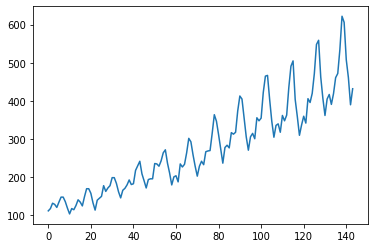

In [8]:
plt.plot(data.iloc[:,1])

In [9]:
from sklearn.preprocessing import MinMaxScaler


In [12]:
scalar=MinMaxScaler(feature_range=(0,1))


In [17]:
data=scalar.fit_transform(data.iloc[:,1:])

In [18]:
data

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [20]:
data.shape

(144, 1)

In [21]:
training_size=int(len(data)*0.65)

In [22]:
test_size=int(len(data)*0.35)

In [23]:
train_df,test_df=data[0:training_size],data[training_size:len(data)]

In [24]:
train_df.shape

(93, 1)

In [26]:
train_df

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [60]:
test_df.shape

(51, 1)

In [31]:
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [32]:
time_step=4
X_train,y_train=create_dataset(train_df,time_step)
X_test,y_test=create_dataset(test_df,time_step)

In [35]:
X_train.shape , y_train.shape

((88, 4), (88,))

In [36]:
X_train=X_train.reshape(X_train.shape[0],4,1)

In [37]:
X_train.shape

(88, 4, 1)

In [39]:
X_test=X_test.reshape(X_test.shape[0],4,1)

In [40]:
X_test.shape

(46, 4, 1)

Create LSTM Models

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [46]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=1,verbose=1)

Train on 88 samples, validate on 46 samples
Epoch 1/100
88/88 [==============================] - 8s 94ms/sample - loss: 0.0154 - val_loss: 0.0271
Epoch 2/100
88/88 [==============================] - 1s 11ms/sample - loss: 0.0069 - val_loss: 0.0294
Epoch 3/100
88/88 [==============================] - 1s 12ms/sample - loss: 0.0069 - val_loss: 0.0292
Epoch 4/100
88/88 [==============================] - 1s 10ms/sample - loss: 0.0051 - val_loss: 0.0348
Epoch 5/100
88/88 [==============================] - 1s 10ms/sample - loss: 0.0062 - val_loss: 0.0273
Epoch 6/100
88/88 [==============================] - 1s 11ms/sample - loss: 0.0060 - val_loss: 0.0247
Epoch 7/100
88/88 [==============================] - 1s 9ms/sample - loss: 0.0053 - val_loss: 0.0245
Epoch 8/100
88/88 [==============================] - 1s 9ms/sample - loss: 0.0050 - val_loss: 0.0249
Epoch 9/100
88/88 [==============================] - 1s 9ms/sample - loss: 0.0046 - val_loss: 0.0265
Epoch 10/100
88/88 [=====================

88/88 [==============================] - 1s 8ms/sample - loss: 0.0019 - val_loss: 0.0095
Epoch 81/100
88/88 [==============================] - 1s 8ms/sample - loss: 0.0019 - val_loss: 0.0123
Epoch 82/100
88/88 [==============================] - 1s 7ms/sample - loss: 0.0019 - val_loss: 0.0073
Epoch 83/100
88/88 [==============================] - 1s 6ms/sample - loss: 0.0020 - val_loss: 0.0142
Epoch 84/100
88/88 [==============================] - 1s 7ms/sample - loss: 0.0022 - val_loss: 0.0103
Epoch 85/100
88/88 [==============================] - 1s 8ms/sample - loss: 0.0020 - val_loss: 0.0086
Epoch 86/100
88/88 [==============================] - 1s 7ms/sample - loss: 0.0017 - val_loss: 0.0105
Epoch 87/100
88/88 [==============================] - 1s 7ms/sample - loss: 0.0018 - val_loss: 0.0079
Epoch 88/100
88/88 [==============================] - 1s 7ms/sample - loss: 0.0018 - val_loss: 0.0122
Epoch 89/100
88/88 [==============================] - 1s 7ms/sample - loss: 0.0019 - val_loss: 

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
test_pred=model.predict(X_test)

In [71]:
scalar.inverse_transform(test_pred)
scalar.inverse_transform(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[0.38030888 0.48648649 0.47104247 0.48455598 0.61389961 0.6969112
 0.7007722  0.57915058 0.46911197 0.38803089 0.44787645 0.45559846
 0.41312741 0.4980695  0.47104247 0.5        0.63899614 0.74710425
 0.77413127 0.57915058 0.49227799 0.3976834  0.44980695 0.49420849
 0.45945946 0.58301158 0.56370656 0.61003861 0.71042471 0.85714286
 0.87837838 0.69305019 0.58494208 0.4980695  0.58108108 0.6042471
 0.55405405 0.60810811 0.68918919 0.71042471 0.83204633 1.
 0.96911197 0.77992278 0.68918919 0.55212355].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [50]:
import math

In [69]:
math.sqrt(mean_squared_error(y_test,test_pred))

0.08844442717926017

In [59]:
test_df

array([[0.38996139],
       [0.32239382],
       [0.38996139],
       [0.40733591],
       [0.38030888],
       [0.48648649],
       [0.47104247],
       [0.48455598],
       [0.61389961],
       [0.6969112 ],
       [0.7007722 ],
       [0.57915058],
       [0.46911197],
       [0.38803089],
       [0.44787645],
       [0.45559846],
       [0.41312741],
       [0.4980695 ],
       [0.47104247],
       [0.5       ],
       [0.63899614],
       [0.74710425],
       [0.77413127],
       [0.57915058],
       [0.49227799],
       [0.3976834 ],
       [0.44980695],
       [0.49420849],
       [0.45945946],
       [0.58301158],
       [0.56370656],
       [0.61003861],
       [0.71042471],
       [0.85714286],
       [0.87837838],
       [0.69305019],
       [0.58494208],
       [0.4980695 ],
       [0.58108108],
       [0.6042471 ],
       [0.55405405],
       [0.60810811],
       [0.68918919],
       [0.71042471],
       [0.83204633],
       [1.        ],
       [0.96911197],
       [0.779

In [68]:
y_test.shape, test_pred.shape

((46,), (46, 1))

In [70]:
y_test

array([0.38030888, 0.48648649, 0.47104247, 0.48455598, 0.61389961,
       0.6969112 , 0.7007722 , 0.57915058, 0.46911197, 0.38803089,
       0.44787645, 0.45559846, 0.41312741, 0.4980695 , 0.47104247,
       0.5       , 0.63899614, 0.74710425, 0.77413127, 0.57915058,
       0.49227799, 0.3976834 , 0.44980695, 0.49420849, 0.45945946,
       0.58301158, 0.56370656, 0.61003861, 0.71042471, 0.85714286,
       0.87837838, 0.69305019, 0.58494208, 0.4980695 , 0.58108108,
       0.6042471 , 0.55405405, 0.60810811, 0.68918919, 0.71042471,
       0.83204633, 1.        , 0.96911197, 0.77992278, 0.68918919,
       0.55212355])